# By: Mohamed Ashraf Ali K

## Task 2: Prediction using Unsupervised ML

## GRIP @ The Sparks Foundation

**Importing required libraries and dataset**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

In [16]:
df = pd.read_csv('2.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
a = df.drop(['Species'],axis=1)
b = df['Species']

label_encoder = preprocessing.LabelEncoder()
b = label_encoder.fit_transform(b)  


**Training Unsupervised KMeans Machine Learning Model**

In [19]:
times = 20 # Number of plot points
inertia = []

for i in range(1,times+1):
    Km = KMeans(n_clusters=i)
    Km = Km.fit(a)
      
    # Append the inertia in list for plotting  
    inertia.append(Km.inertia_) 
    

C:\Users\91989\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Elbow plot to find optimal clusters by plotting inertias**

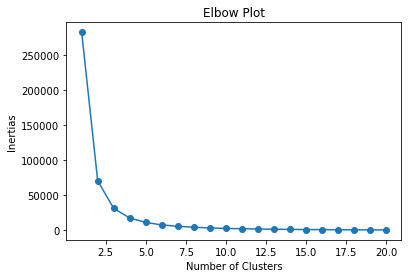

In [20]:
plt.plot([*range(1,times+1)], inertia,marker='o')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.title('Elbow Plot')  

plt.show()

**Predicting for number of clusters = 3**

In [23]:
a = df.iloc[:, [0, 1, 2, 3]].values
b = label_encoder.fit_transform(df['Species'])  
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(a)  

**Graphical Representation of Clusters**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


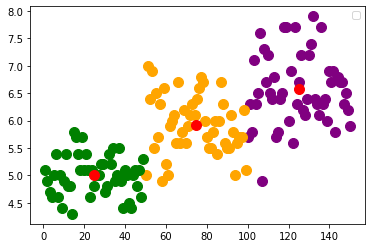

In [24]:
#Visualising the clusters
plt.scatter(a[y_kmeans == 0, 0], a[y_kmeans == 0, 1], s = 100, c = 'purple')
plt.scatter(a[y_kmeans == 1, 0], a[y_kmeans == 1, 1], s = 100, c = 'orange')
plt.scatter(a[y_kmeans == 2, 0], a[y_kmeans == 2, 1], s = 100, c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red')

plt.legend()

**Calculating Confusion Matrix**

In [26]:
confusion_matrix = metrics.confusion_matrix(b, kmeans.labels_)
confusion_matrix

array([[ 0,  1, 49],
       [ 1, 49,  0],
       [50,  0,  0]], dtype=int64)

## Inference:
## We observe that optimal number of clusters 3 and the confusion matrix plot shows (1,0,2) - Iris-versicolor,  Iris-setosa, Iris-virginica

## Conclusion:
## Therefore I have successfully completed unsupervised machine learning on iris dataset, also graphically shown the clusters and calculated confusion matrix